In [58]:
import pandas as pd
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import plotly.graph_objects as table

In [59]:
df = pd.read_csv('./breast-cancer-dataset/wdbc.data') #Importo el dataset a un DataFrame
df

,842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,...,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.5355,0.1741,0.3985,0.12440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
564,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
565,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
566,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [60]:
df.columns #Compruebo el nombre de las columnas del DataFrame

Index(['842302', 'M', '17.99', '10.38', '122.8', '1001', '0.1184', '0.2776',
       '0.3001', '0.1471', '0.2419', '0.07871', '1.095', '0.9053', '8.589',
       '153.4', '0.006399', '0.04904', '0.05373', '0.01587', '0.03003',
       '0.006193', '25.38', '17.33', '184.6', '2019', '0.1622', '0.6656',
       '0.7119', '0.2654', '0.4601', '0.1189'],
      dtype='object')

In [61]:
#Añado una fila header que contiene los encabezados de cada columna
df.columns = ['Id', 'Diagnosis', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30']

In [62]:
df.columns #Compruebo el nombre de las columnas del DataFrame

Index(['Id', 'Diagnosis', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30'],
      dtype='object')

In [63]:
df.isnull().sum() #Compruebo que el Dataframe no tenga valores null

Id           0
Diagnosis    0
1            0
2            0
3            0
4            0
5            0
6            0
7            0
8            0
9            0
10           0
11           0
12           0
13           0
14           0
15           0
16           0
17           0
18           0
19           0
20           0
21           0
22           0
23           0
24           0
25           0
26           0
27           0
28           0
29           0
30           0
dtype: int64

In [64]:
print('?' in df) #Compruebo si en el DataFrame existe alguna variable con el valor de ?

False


In [65]:
df.dtypes #Compruebo el tipo de datos de cada columna

Id             int64
Diagnosis     object
1            float64
2            float64
3            float64
4            float64
5            float64
6            float64
7            float64
8            float64
9            float64
10           float64
11           float64
12           float64
13           float64
14           float64
15           float64
16           float64
17           float64
18           float64
19           float64
20           float64
21           float64
22           float64
23           float64
24           float64
25           float64
26           float64
27           float64
28           float64
29           float64
30           float64
dtype: object

In [66]:
df['Diagnosis'] #Visualizo los valores de la columna Diagnosis

0      M
1      M
2      M
3      M
4      M
      ..
563    M
564    M
565    M
566    M
567    B
Name: Diagnosis, Length: 568, dtype: object

In [67]:
#Transformo los valores de 'M' a 1 y los valores de 'B a 0 para que sean numéricos
df['Diagnosis'] = df['Diagnosis'].apply(lambda x:1 if x=='M' else 0)

In [68]:
df['Diagnosis'] #Visualizo los valores de la columna Diagnosis y compruebo que ya son numéricos

0      1
1      1
2      1
3      1
4      1
      ..
563    1
564    1
565    1
566    1
567    0
Name: Diagnosis, Length: 568, dtype: int64

In [69]:
X = df.drop(columns = ["Id", "Diagnosis"]) #Elimino las columnas de Id y Diagnosis para formar mi conjunto de entrenamiento
y = df["Diagnosis"] #Con la columna Diagnosis formo mi conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Accuracy Train (Precisión de entrenamiento):  0.8690176322418136
Accuracy Test (Precisión de prueba:  0.8362573099415205


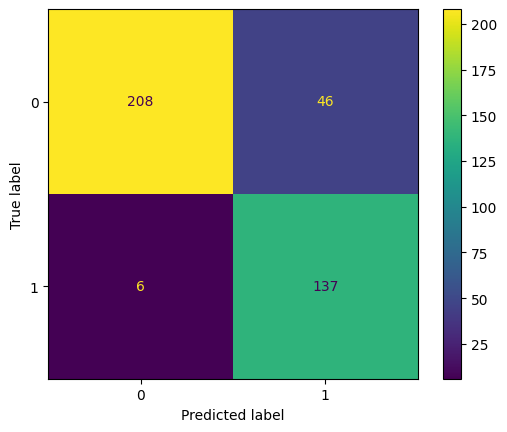

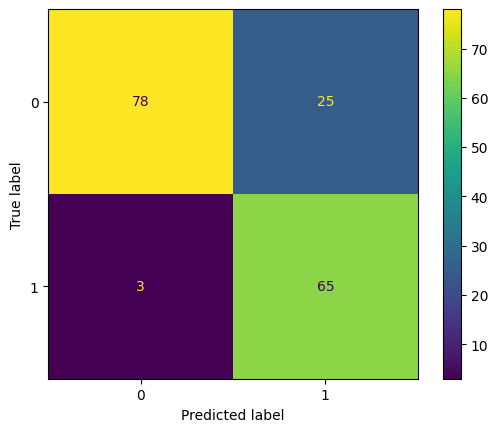

In [70]:
linear_clf = SGDClassifier(max_iter=1000, tol=1e-3)
linear_clf.fit(X_train, y_train)

y_pred = linear_clf.predict(X_train) #Visualizo la matriz de confusión de entrenamiento
cm = confusion_matrix(y_train, y_pred, labels=linear_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=linear_clf.classes_)
disp.plot()
accuracy_train_linear_clf = accuracy_score(y_train, y_pred)
print("Accuracy Train (Precisión de entrenamiento): ", accuracy_train_linear_clf)

y_pred = linear_clf.predict(X_test) #Visualizo la matriz de confusión de prueba
cm = confusion_matrix(y_test, y_pred, labels=linear_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=linear_clf.classes_)
disp.plot()
accuracy_test_linear_clf = accuracy_score(y_test, y_pred)
print("Accuracy Test (Precisión de prueba: ", accuracy_test_linear_clf)

Accuracy Train (Precisión de entrenamiento):  0.9395465994962217
Accuracy Test (Precisión de prueba:  0.935672514619883


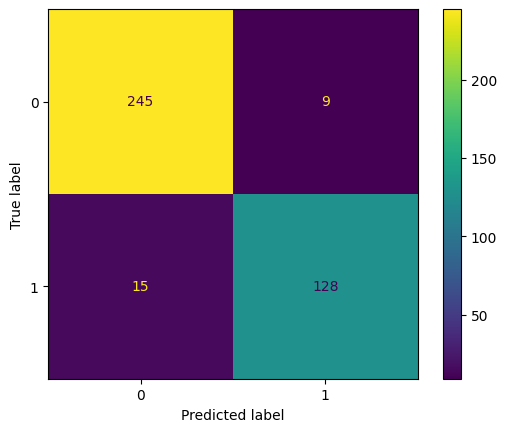

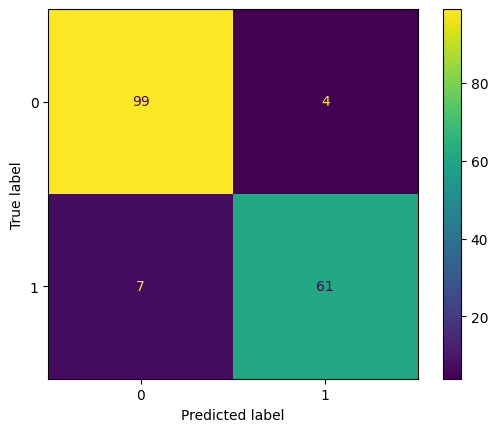

In [71]:
knn_clf = KNeighborsClassifier (n_neighbors=9)
knn_clf.fit(X_train, y_train)

y_pred = knn_clf.predict(X_train) #Visualizo la matriz de confusión de entrenamiento
cm = confusion_matrix(y_train, y_pred, labels=knn_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_clf.classes_)
disp.plot()
accuracy_train_knn_clf = accuracy_score(y_train, y_pred)
print("Accuracy Train (Precisión de entrenamiento): ", accuracy_train_knn_clf)

y_pred = knn_clf.predict(X_test) #Visualizo la matriz de confusión de prueba
cm = confusion_matrix(y_test, y_pred, labels=knn_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_clf.classes_)
disp.plot()
accuracy_test_knn_clf = accuracy_score(y_test, y_pred)
print("Accuracy Test (Precisión de prueba: ", accuracy_test_knn_clf)

Accuracy Train (Precisión de entrenamiento):  1.0
Accuracy Test (Precisión de prueba:  0.9298245614035088


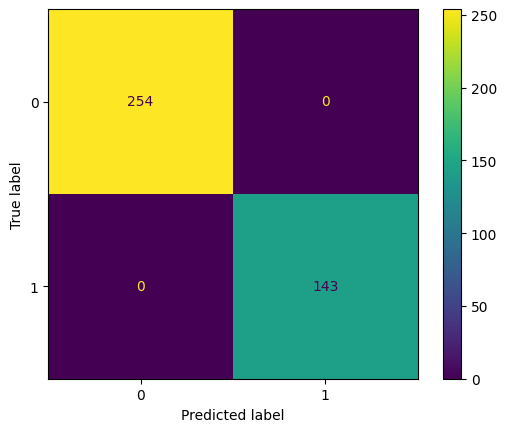

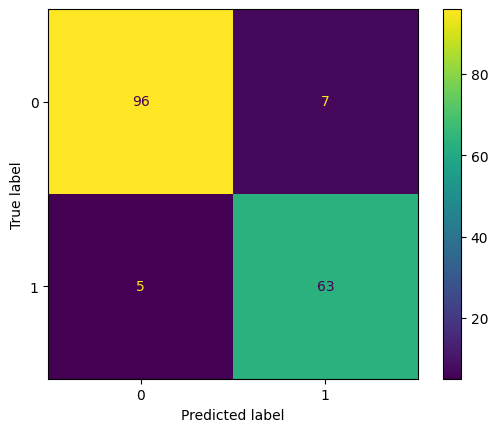

In [72]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

y_pred = dt_clf.predict(X_train) #Visualizo la matriz de confusión de entrenamiento
cm = confusion_matrix(y_train, y_pred, labels=dt_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt_clf.classes_)
disp.plot()
accuracy_train_dt_clf = accuracy_score(y_train, y_pred)
print("Accuracy Train (Precisión de entrenamiento): ", accuracy_train_dt_clf)

y_pred = dt_clf.predict(X_test) #Visualizo la matriz de confusión de prueba
cm = confusion_matrix(y_test, y_pred, labels=dt_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt_clf.classes_)
disp.plot()
accuracy_test_dt_clf = accuracy_score(y_test, y_pred)
print("Accuracy Test (Precisión de prueba: ", accuracy_test_dt_clf)

La profundidad del árbol de decisión es:  6


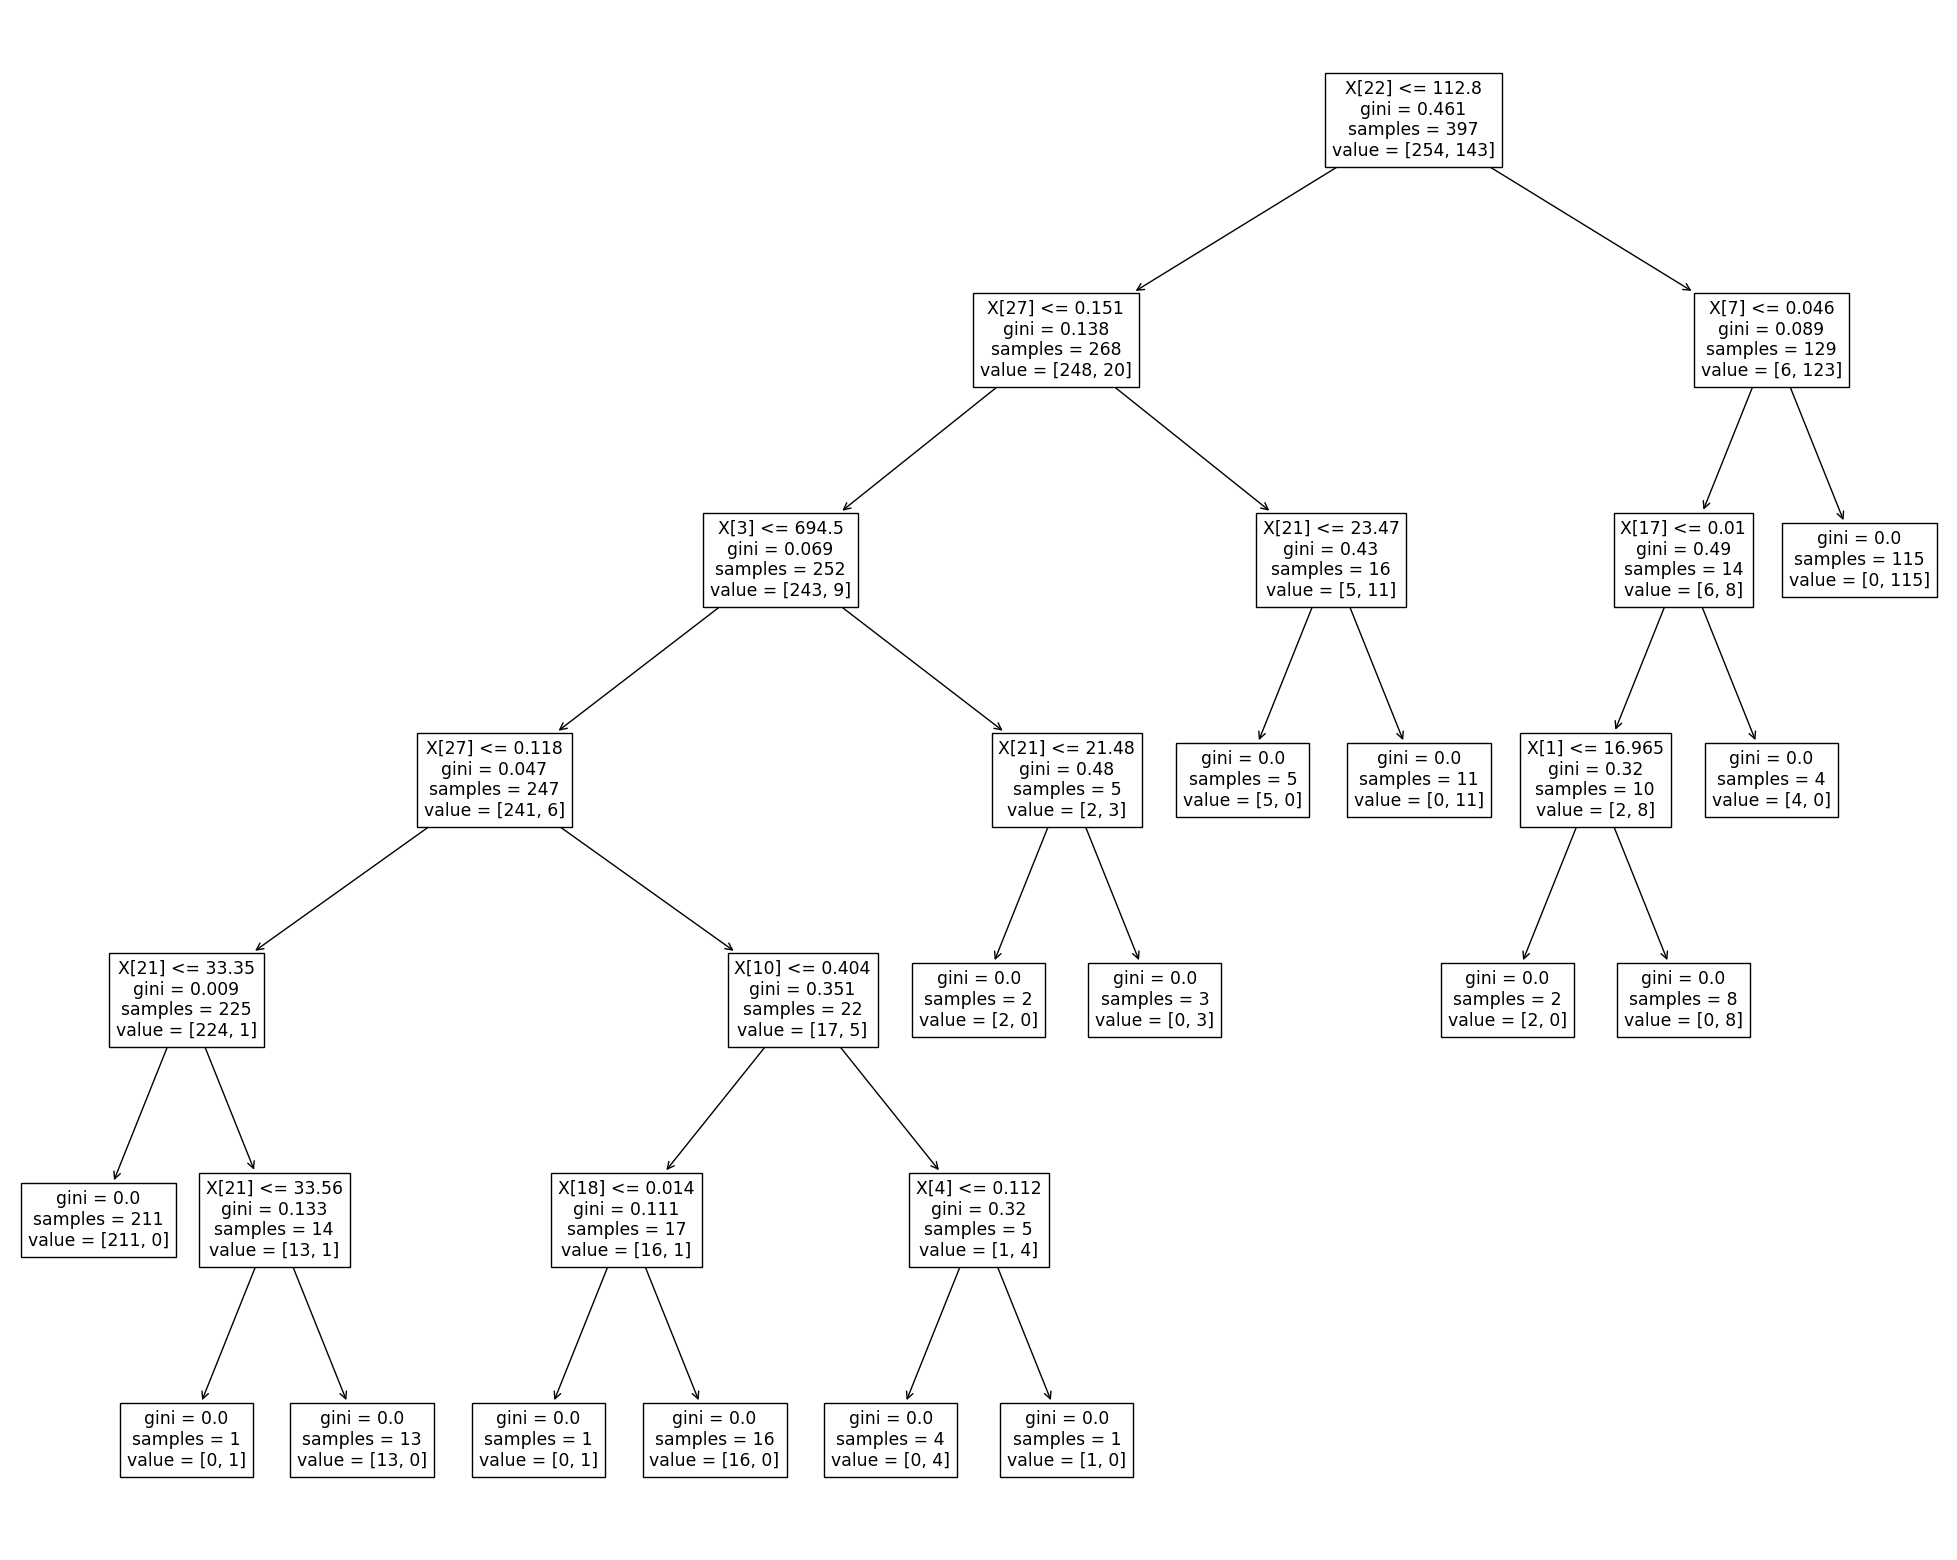

In [73]:
print("La profundidad del árbol de decisión es: ", dt_clf.get_depth())

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt_clf)

Accuracy Train (Precisión de entrenamiento):  0.9974811083123426
Accuracy Test (Precisión de prueba:  0.9473684210526315


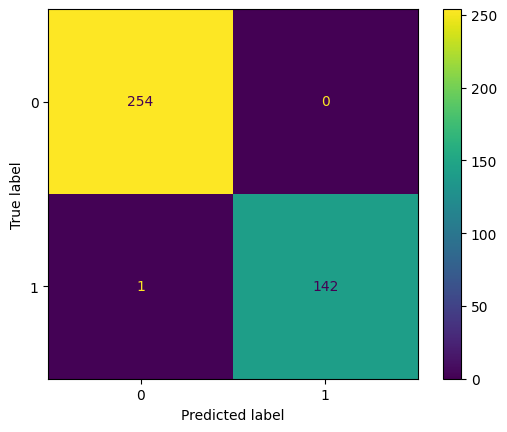

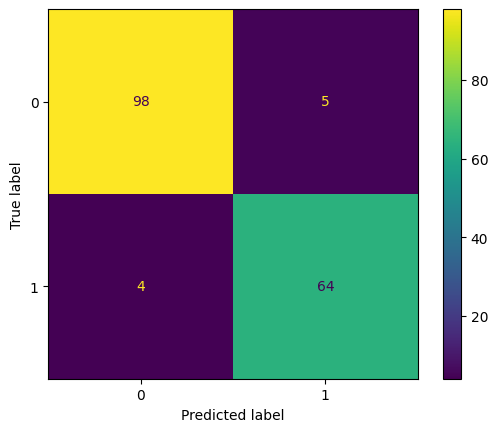

In [74]:
dt_clf = DecisionTreeClassifier(max_depth=7)
dt_clf.fit(X_train, y_train)

y_pred = dt_clf.predict(X_train) #Visualizo la matriz de confusión de entrenamiento
cm = confusion_matrix(y_train, y_pred, labels=dt_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt_clf.classes_)
disp.plot()
accuracy_train_dt_clf_with_depth = accuracy_score(y_train, y_pred)
print("Accuracy Train (Precisión de entrenamiento): ", accuracy_train_dt_clf_with_depth)

y_pred = dt_clf.predict(X_test) #Visualizo la matriz de confusión de prueba
cm = confusion_matrix(y_test, y_pred, labels=dt_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt_clf.classes_)
disp.plot()
accuracy_test_dt_clf_with_depth = accuracy_score(y_test, y_pred)
print("Accuracy Test (Precisión de prueba: ", accuracy_test_dt_clf_with_depth)

La profundidad del árbol de decisión es:  7


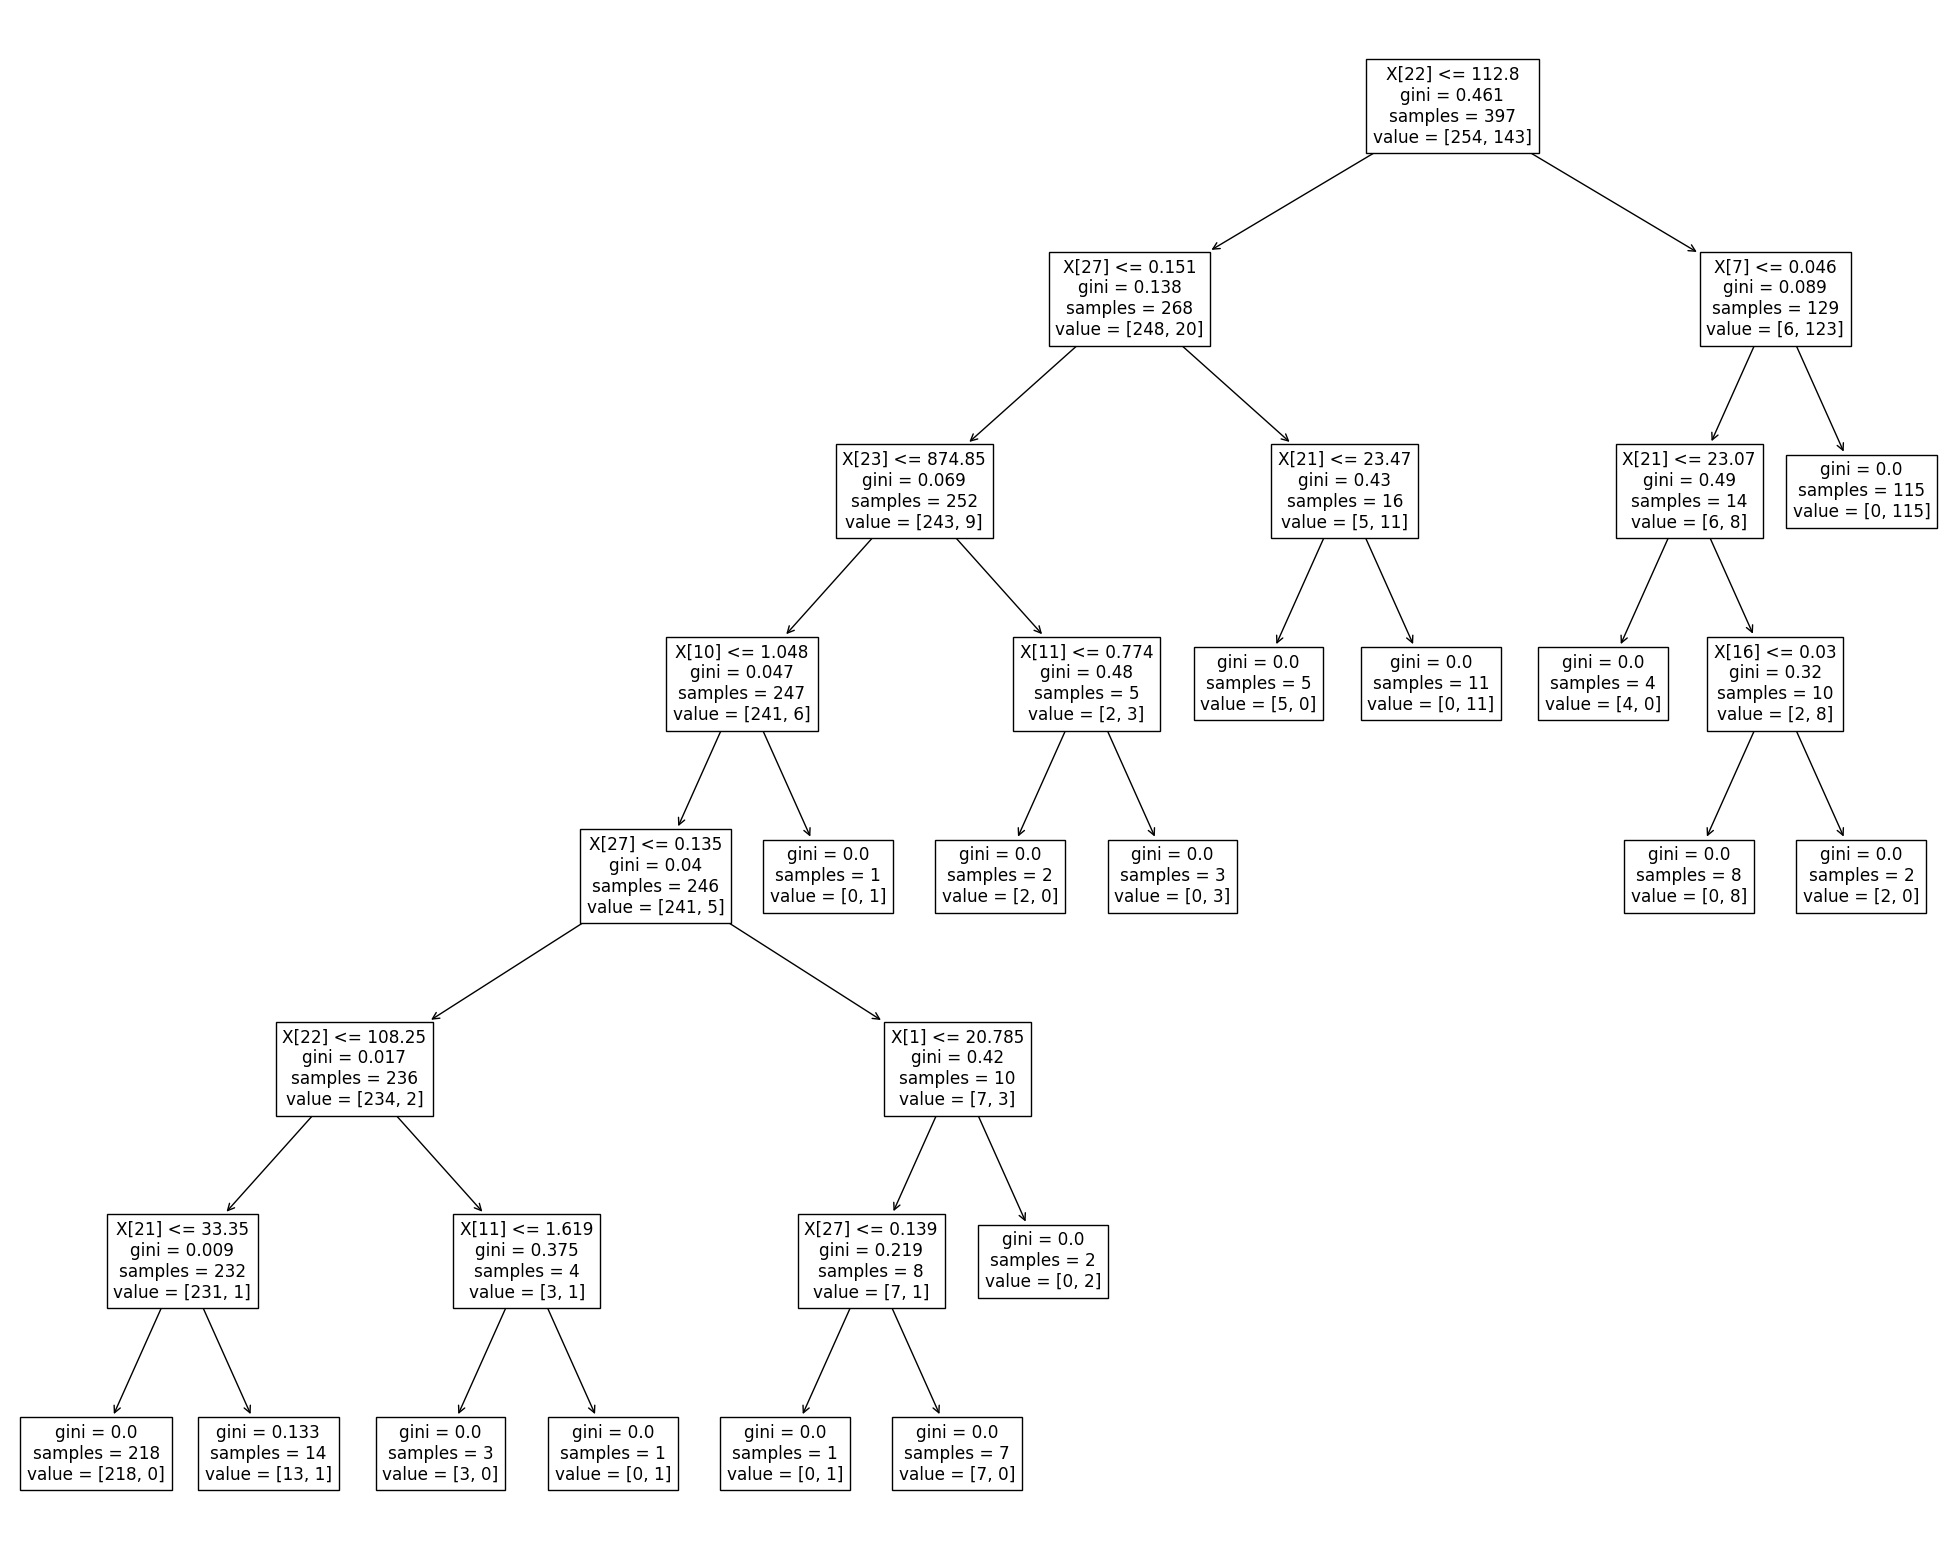

In [75]:
print("La profundidad del árbol de decisión es: ", dt_clf.get_depth())

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt_clf)

Accuracy Train (Precisión de entrenamiento):  1.0
Accuracy Test (Precisión de prueba:  0.9532163742690059


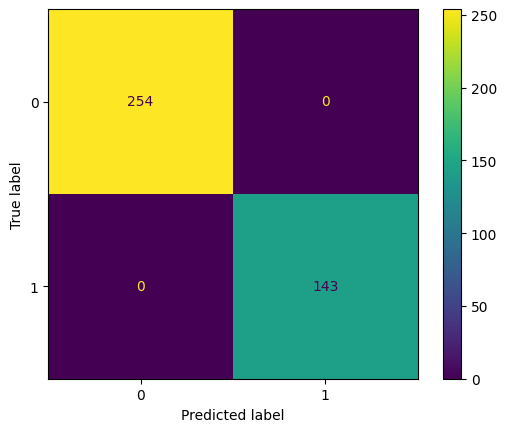

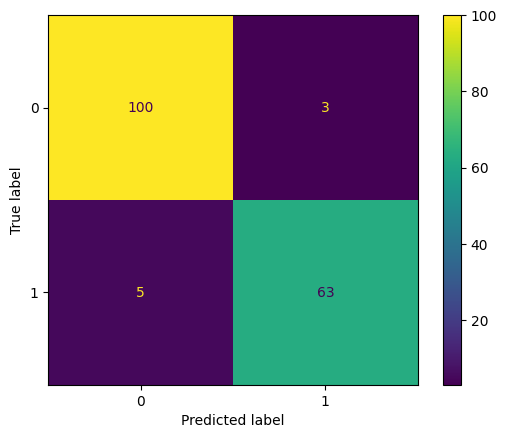

In [76]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_train) #Visualizo la matriz de confusión de entrenamiento
cm = confusion_matrix(y_train, y_pred, labels=rf_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_clf.classes_)
disp.plot()
accuracy_train_rf_clf = accuracy_score(y_train, y_pred)
print("Accuracy Train (Precisión de entrenamiento): ", accuracy_train_rf_clf)

y_pred = rf_clf.predict(X_test) #Visualizo la matriz de confusión de prueba
cm = confusion_matrix(y_test, y_pred, labels=rf_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_clf.classes_)
disp.plot()
accuracy_test_rf_clf = accuracy_score(y_test, y_pred)
print("Accuracy Test (Precisión de prueba: ", accuracy_test_rf_clf)

Accuracy Train (Precisión de entrenamiento):  1.0
Accuracy Test (Precisión de prueba:  0.9649122807017544


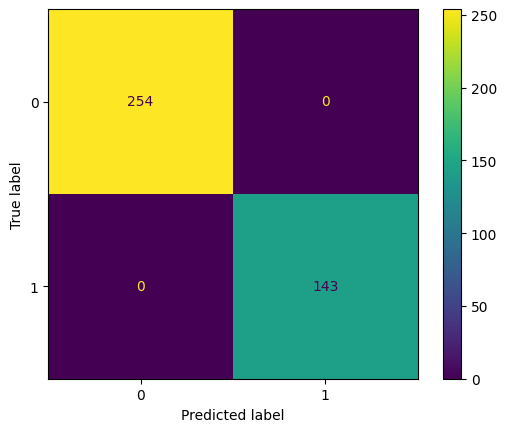

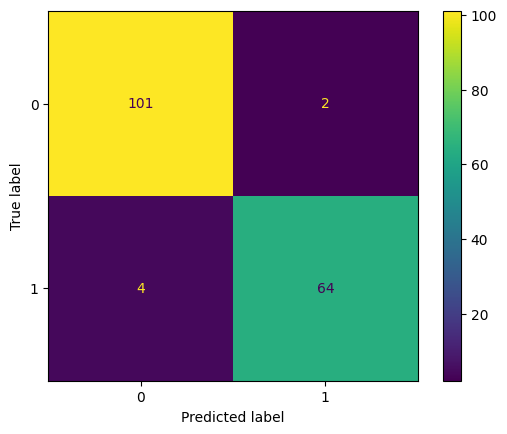

In [77]:
rf_clf = RandomForestClassifier(max_depth=7)
rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_train) #Visualizo la matriz de confusión de entrenamiento
cm = confusion_matrix(y_train, y_pred, labels=rf_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_clf.classes_)
disp.plot()
accuracy_train_rf_clf_with_depth = accuracy_score(y_train, y_pred)
print("Accuracy Train (Precisión de entrenamiento): ", accuracy_train_rf_clf_with_depth)

y_pred = rf_clf.predict(X_test) #Visualizo la matriz de confusión de prueba
cm = confusion_matrix(y_test, y_pred, labels=rf_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_clf.classes_)
disp.plot()
accuracy_test_rf_clf_with_depth = accuracy_score(y_test, y_pred)
print("Accuracy Test (Precisión de prueba: ", accuracy_test_rf_clf_with_depth)

In [79]:
fig = table.Figure(data=[table.Table( 
    header=dict(values=['Modelo Supervisado', 'Accuracy Train', 'Accuracy Test']), 
    cells=dict(values=[['Regresión Lineal', 'KNN con regularización', 'Árbol de Decisión', 'Árbol de Decisión con regularización', 'Random Forest', 'Random Forest con regularización'], 
                       [accuracy_train_linear_clf, accuracy_train_knn_clf, accuracy_train_dt_clf, accuracy_train_dt_clf_with_depth, accuracy_train_rf_clf, accuracy_train_rf_clf_with_depth],
                       [accuracy_test_linear_clf, accuracy_test_knn_clf, accuracy_test_dt_clf, accuracy_test_dt_clf_with_depth, accuracy_test_rf_clf, accuracy_test_rf_clf_with_depth]])) 
]) 
fig.show()